# Linear Regression on the Boston dataset

The $\texttt{Boston}$ dataset records the median house value for 506 neighbourhoods around Boston. The dataset can easily be accessed through $\texttt{sklearn.datasets}$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from statsmodels.formula.api import ols
%matplotlib inline

Load the dataset and convert it to a pandas DataFrame:

In [2]:
bos=sklearn.datasets.load_boston()
boston=pd.DataFrame(bos.data, columns=bos.feature_names)
boston['MEDV']=bos.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Simple linear regression

The purpose of analyzing the Boston dataset is to predict $\texttt{MEDV}$ using linear regression on the set of 13 predictors. Suppose we take $\texttt{LSTAT}$ as the predictor:

In [3]:
simple=ols('MEDV~LSTAT',boston).fit()
simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Thu, 30 Nov 2017   Prob (F-statistic):           5.08e-88
Time:                        14:30:46   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The object $\texttt{simple}$ allows access to various statistical quantities e.g. regression coefficients, confidence intervals, prediction intervals etc. Return only the coefficients:

In [4]:
simple.params

Intercept    34.553841
LSTAT        -0.950049
dtype: float64

Return confidence interval for above coefficient estimates:

In [5]:
simple.conf_int()

,0,1
Intercept,33.448457,35.659225
LSTAT,-1.026148,-0.873951


Suppose we want to predict $\texttt{MEDV}$ for $\texttt{LSTAT}$ values of 5,10,15, including their respective confidence and prediction intervals.

In [6]:
pred=simple.get_prediction(exog=np.array([[1,5],[1,10],[1,15]]), transform=False)
pred.summary_frame()

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,29.803594,0.405247,29.007412,30.599776,17.565675,42.041513
1,25.053347,0.294814,24.474132,25.632563,12.827626,37.279068
2,20.303101,0.290893,19.731588,20.874613,8.077742,32.528459


$\texttt{mean}$ is the fitted value, $\texttt{mean_ci_lower}$ and $\texttt{mean_ci_upper}$ are the bounds of the 95% confidence interval, and $\texttt{obs_ci_lower}$ and $\texttt{obs_ci_upper}$ are the bounds of the 95% prediction interval.

The $R^2$ statistic does not indicate a very good fit. Look at the residual plot:

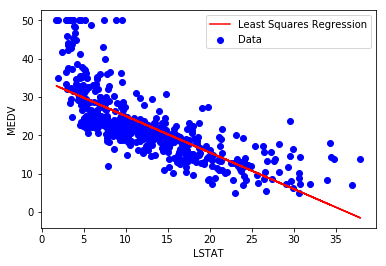

In [7]:
plt.scatter(boston.LSTAT, boston.MEDV, c='b', label='Data')
plt.plot(boston.LSTAT, simple.fittedvalues, 'r-', label='Least Squares Regression')
plt.legend(loc='best')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')

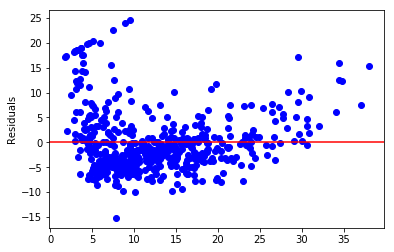

In [8]:
plt.scatter(boston.LSTAT, simple.resid, c='b')
plt.axhline(y=0, c='r')
plt.ylabel('Residuals')

There's some evidence of non-linearity. Plot the studentized residuals; each studentized residual is computed by dividing the residual by its standard error.

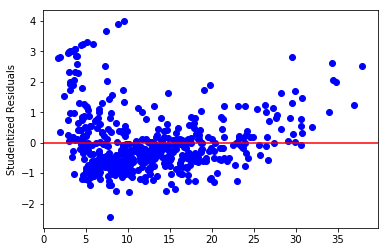

In [9]:
plt.scatter(boston.LSTAT, simple.outlier_test().student_resid, c='b')
plt.axhline(y=0, c='r')
plt.ylabel('Studentized Residuals')

Most studentized residuals are between -2 and 2, and there are several greater than 3, which are likely to be outliers.

## Multiple linear regression

Suppose we want to predict $\texttt{MEDV}$ using $\texttt{LSTAT}$ and $\texttt{AGE}$ as predictors.

In [10]:
multiple=ols('MEDV~LSTAT+AGE',boston).fit()
multiple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Thu, 30 Nov 2017   Prob (F-statistic):           2.98e-88
Time:                        14:30:47   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     33.2228      0.731     45.458      0.000      31.787      34.659
LSTAT         -1.0321      0.048    -21.416      0.000      -1.127      -0.937
AGE            0.0345      0.012      2.826      0.005       0.011       0.059
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Again, the $R^2$ does not indicate such a great fit. Suppose we want to predict $\texttt{MEDV}$ using all 13 variables as predictors.

In [11]:
formula='+'.join(boston.drop('MEDV', axis=1,inplace=False).columns)
multiple2=ols('MEDV ~'+formula,boston).fit()
multiple2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 30 Nov 2017   Prob (F-statistic):          6.95e-135
Time:                        14:30:47   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4911      5.104      7.149      0.000      26.462      46.520
CRIM          -0.1072      0.033     -3.276      0.001      -0.171      -0.043
ZN             0.0464      0.014      3.380      0.001       0.019       0.073
INDUS          0.0209      0.061      0.339      0.735      -0.100       0.142
CHAS           2.6886      0.862      3.120      0.002       0.996       4.381
NOX          -17.7958      3.821     -4.658      0.000     -25.302     -10.289
RM             3.8048      0.418      9.102      0.000       2.983       4.626
AGE            0.0008      0.013      0.057      0.955      -0.025       0.027
DIS           -1.4758      0.199     -7.398      0.000      -1.868      -1.084
RAD            0.3057      0.066      4.608      0.000       0.175       0.436
TAX           -0.0123      0.004     -3.278      0.001      -0.020      -0.005
PTRATIO       -0.9535      0.131     -7.287      0.000      -1.211      -0.696
B              0.0094      0.003      3.500      0.001       0.004       0.015
LSTAT         -0.5255      0.051    -10.366      0.000      -0.625      -0.426
==============================================================================
Omnibus:                      178.029   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              782.015
Skew:                           1.521   Prob(JB):                    1.54e-170
Kurtosis:                       8.276   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The statistically significant p-values are for $\texttt{INDUS}$ and $\texttt{AGE}$, which means there's high likelihood these 2 predictors do not contribute to the linear fit, i.e. their coefficients in the linear regression model are null.

Suppose we want to add an interaction term, e.g. predicting $\texttt{MEDV}$ using $\texttt{LSTAT}, \texttt{AGE}$ and $\texttt{LSTAT*AGE}$.

In [12]:
multiple3=ols('MEDV~LSTAT*AGE', boston).fit()
multiple3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Thu, 30 Nov 2017   Prob (F-statistic):           4.86e-88
Time:                        14:30:47   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.000      33.201      38.976
LSTAT         -1.3921      0.167     -8.313      0.000      -1.721      -1.063
AGE           -0.0007      0.020     -0.036      0.971      -0.040       0.038
LSTAT:AGE      0.0042      0.002      2.244      0.025       0.001       0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Nonlinear transformations

Finally, suppose we want to get a better fit using a nonlinear model, e.g. predicting $\texttt{MEDV}$ using a quadratic model of predictor $\texttt{LSTAT}$:

In [13]:
nonlinear=ols('MEDV~LSTAT+I(LSTAT**2)', boston).fit()
nonlinear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Thu, 30 Nov 2017   Prob (F-statistic):          1.56e-112
Time:                        14:30:48   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        42.8620      0.872     49.149      0.000      41.149      44.575
LSTAT            -2.3328      0.124    -18.843      0.000      -2.576      -2.090
I(LSTAT ** 2)     0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The $R^2$ statistic shows improvement.

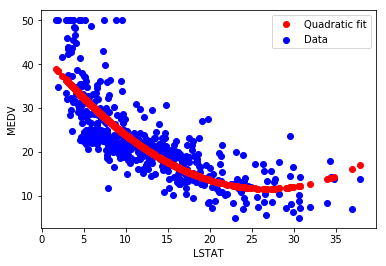

In [14]:
plt.scatter(boston.LSTAT, boston.MEDV, c='b',label='Data')
plt.plot(boston.LSTAT, nonlinear.fittedvalues, 'ro', label='Quadratic fit')
plt.legend(loc='best')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')